<a href="https://colab.research.google.com/github/marcgym2/MachineLearning/blob/main/Tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarea (10 puntos)

- Investigar sobre algoritmos supervisados que puedan aplicarse a tu problema. Da un panorama sobre el modelo matemático que emplean y explica por qué conviene utilizarlo
- Investigar sobre métricas para analizar los errores de tus datos y discutirla (generalmente se usan MAE, MAPE, RMSE, MSE...)
- Aplicar al menos un algoritmo supervisado a tus datos para predecir alguna variable (puede ser interpolación o extrapolación)
- Actualiza literatura relacionada, metodología, resultados y discusión en tu artículo
- Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados

Dado que desea predecir el torque, una variable continua, se pueden considerar varios algoritmos supervisados para abordar el problema:

- Regresión lineal: Técnica comúnmente utilizada para problemas de predicción de variables continuas. La regresión lineal puede ser una buena opción para predecir el torque si la relación entre las variables de entrada y el torque puede modelarse de manera lineal. El modelo toma la forma de una ecuación lineal de la forma: $$y = b_0 + b_1 x_1 + b_2 x_2 + ... + b_n x_n$$

  donde $y$ es la variable de salida que se desea predecir, $x_1, x_2, ..., x_n$ son las variables de entrada, y $b_0, b_1, b_2, ..., b_n$ son los coeficientes que se ajustan durante el entrenamiento del modelo.

- Regresión de árbol de decisión: La regresión de árbol de decisión utiliza un modelo matemático que se basa en una estructura de árbol. Cada nodo en el árbol representa una variable de entrada y cada borde representa una regla de decisión que divide el espacio de entrada en regiones cada vez más pequeñas. La predicción se realiza siguiendo el camino a través del árbol hasta que se llega a una hoja que proporciona la predicción.
- Random Forest: Random Forest utiliza múltiples árboles de decisión y combina sus predicciones para obtener una predicción más precisa. Cada árbol en el bosque se construye de manera similar a la regresión de árbol de decisión descrita anteriormente.
- Redes neuronales: Las redes neuronales utilizan un modelo matemático que está inspirado en la forma en que funciona el cerebro. Las redes neuronales consisten en capas de neuronas artificiales, donde cada neurona toma las entradas de las neuronas de la capa anterior y produce una salida que se alimenta en las neuronas de la capa siguiente. Las neuronas están conectadas por pesos que se ajustan durante el entrenamiento de la red. La salida final de la red es una combinación no lineal de las entradas y los pesos.

Se decide utilizar el de árbol de decisión ya que pueden ser rápidos y eficientes en términos de recursos computacionales. Además, los árboles de decisión proporcionan una representación gráfica del modelo resultante, lo que puede ser útil para interpretar los resultados

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Cargar los datos
from google.colab import drive
drive.mount("/content/drive")
df_measures = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/measures_v2.csv")

Mounted at /content/drive


In [4]:
# Separar las variables independientes (X) y la variable dependiente (y)
X = df_measures.drop(['torque'], axis=1)
y = df_measures['torque']

In [5]:
# Normalizar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# reducir la dimensionalidad de los datos
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X = pca.fit_transform(X)

In [8]:
# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Crear el modelo de árbol de decisión
tree = DecisionTreeRegressor(random_state=42)

In [10]:
# Entrenar el modelo
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [11]:
# Realizar predicciones con el conjunto de prueba
y_pred = tree.predict(X_test)

In [12]:
# Calcular las métricas de error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Coefficient of determination (R^2): {:.2f}".format(r2))

Mean Squared Error (MSE): 0.39
Coefficient of determination (R^2): 1.00


Un **MSE (Mean Squared Error) de 0.39** indica que, en promedio, el modelo tiene un error cuadrático medio de 0.39 unidades al predecir la variable de interés. Un MSE bajo indica que el modelo tiene una buena capacidad de predicción, ya que los errores en las predicciones son relativamente pequeños.

Por otro lado, un **$R2$ (coeficiente de determinación) de 1** indica que el modelo se ajusta perfectamente a los datos y es capaz de explicar el 100% de la variabilidad en la variable de interés. Es decir, todas las variaciones observadas en los datos se explican por el modelo, lo que sugiere que el modelo es altamente preciso y adecuado para las predicciones.

Sin embargo, es importante tener en cuenta que un $R2$ de 1 puede ser una señal de sobreajuste del modelo a los datos,

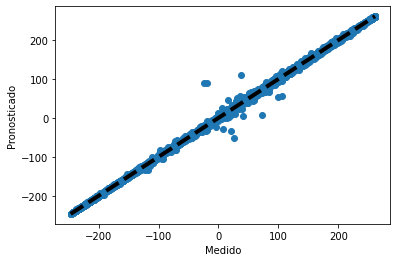

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Medido')
plt.ylabel('Pronosticado')
plt.show()

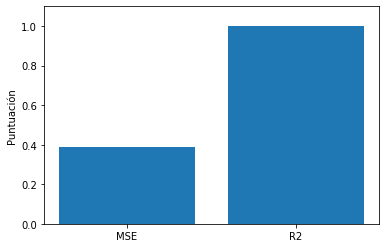

In [14]:
import numpy as np

plt.bar(['MSE', 'R2'], [mse, r2])
plt.ylim(0, np.max([mse, r2])*1.1)
plt.ylabel('Puntuación')
plt.show()

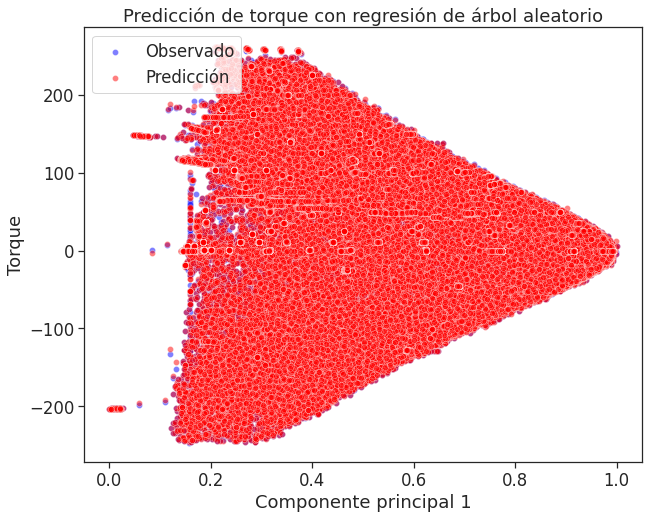

In [16]:
import seaborn as sns
# graficar el árbol de decision
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.set(font_scale=1.5)
sns.set_palette("husl")
sns.despine()
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_palette("husl")
sns.scatterplot(x=X_test[:,0], y=y_test, color='blue', alpha=0.5, label='Observado')
sns.scatterplot(x=X_test[:,0], y=y_pred, color='red', alpha=0.5, label='Predicción')
plt.xlabel('Componente principal 1')
plt.ylabel('Torque')
plt.legend(loc='upper left')
plt.title('Predicción de torque con regresión de árbol aleatorio')
plt.show()

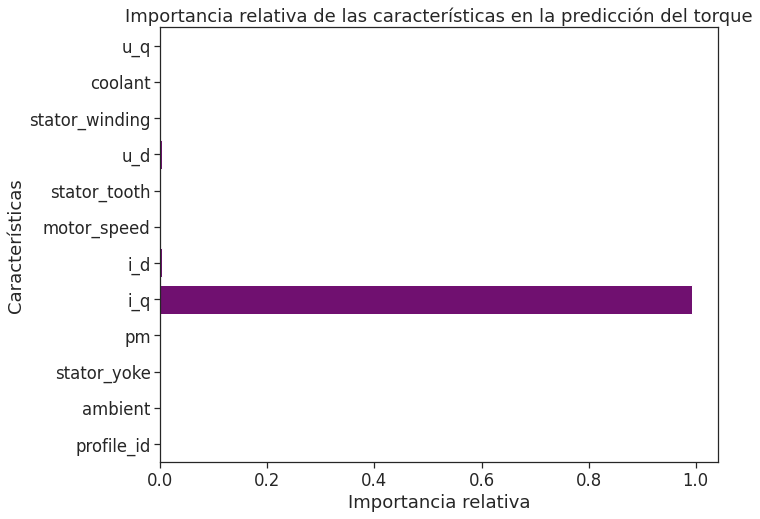

In [18]:
# graficar la importancia de las características
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.set(font_scale=1.5)
sns.set_palette("husl")
sns.despine()
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_palette("husl")

importance = tree.feature_importances_
sns.barplot(x=importance, y=df_measures.drop('torque', axis=1).columns, color='purple')
plt.xlabel('Importancia relativa')
plt.ylabel('Características')
plt.title('Importancia relativa de las características en la predicción del torque')
plt.show()